# Introduction to Polars

**Outline**:

    - Reading and Writing Data
    - Expressions
    - Eager and Lazy APIs
    - Selecting and Creating Columns
    - Filtering and Sorting Rows
    - Working with Textual, Temporal, and Nested Data Types
    - Joining and Concatenating
    - Reshaping



In [2]:
!pip install polars
import polars as pl

pl.__version__ 

'1.36.1'

# Reading and Writing Data


Format Overview:
![Format Overview](img/formats-table.png)

In [3]:
penguins = pl.read_csv("data/penguins.csv")
penguins

rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
i64,str,str,str,str,str,str,str,i64
1,"""Adelie""","""Torgersen""","""39.1""","""18.7""","""181""","""3750""","""male""",2007
2,"""Adelie""","""Torgersen""","""39.5""","""17.4""","""186""","""3800""","""female""",2007
3,"""Adelie""","""Torgersen""","""40.3""","""18""","""195""","""3250""","""female""",2007
4,"""Adelie""","""Torgersen""","""NA""","""NA""","""NA""","""NA""","""NA""",2007
5,"""Adelie""","""Torgersen""","""36.7""","""19.3""","""193""","""3450""","""female""",2007
…,…,…,…,…,…,…,…,…
340,"""Chinstrap""","""Dream""","""55.8""","""19.8""","""207""","""4000""","""male""",2009
341,"""Chinstrap""","""Dream""","""43.5""","""18.1""","""202""","""3400""","""female""",2009
342,"""Chinstrap""","""Dream""","""49.6""","""18.2""","""193""","""3775""","""male""",2009



Parsing Missing Values Correctly. Unfortunately for plain-text formats such as CSV, there’s no standard way to represent these. Representations that we’ve seen in the wild include NULL, Nil, None, NA, N/A, NaN, 999999, and the empty String. By default, Polars only interprets empty Strings as missing values.


In [4]:
penguins = pl.read_csv("data/penguins.csv", null_values="NA")
penguins

rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
i64,str,str,f64,f64,i64,i64,str,i64
1,"""Adelie""","""Torgersen""",39.1,18.7,181,3750,"""male""",2007
2,"""Adelie""","""Torgersen""",39.5,17.4,186,3800,"""female""",2007
3,"""Adelie""","""Torgersen""",40.3,18.0,195,3250,"""female""",2007
4,"""Adelie""","""Torgersen""",null,null,null,null,null,2007
5,"""Adelie""","""Torgersen""",36.7,19.3,193,3450,"""female""",2007
…,…,…,…,…,…,…,…,…
340,"""Chinstrap""","""Dream""",55.8,19.8,207,4000,"""male""",2009
341,"""Chinstrap""","""Dream""",43.5,18.1,202,3400,"""female""",2009
342,"""Chinstrap""","""Dream""",49.6,18.2,193,3775,"""male""",2009


In [5]:
penguins.null_count().transpose(  
    include_header=True, column_names=["null_count"]
)

column,null_count
str,u32
"""rowid""",0
"""species""",0
"""island""",0
"""bill_length_mm""",2
"""bill_depth_mm""",2
"""flipper_length_mm""",2
"""body_mass_g""",2
"""sex""",11
"""year""",0



Working with Multiple Files. Globbing patterns can contain special characters which act as wildcards, such as:

    - Asterisks (*), which match zero or more characters in a String. For example, the pattern *.csv will match any filename that ends in .csv.
    - Question marks (?), which match exactly one character. For example, the pattern file?.csv will match files like file1.csv or fileA.csv but not file12.csv.
    - Square brackets ([]),



In [6]:
pl.read_csv("data/stock/nvda/201?.csv")

symbol,date,open,high,low,close,adj close,volume
str,str,f64,f64,f64,f64,f64,i64
"""NVDA""","""2010-01-04""",4.6275,4.655,4.5275,4.6225,4.240429,80020400
"""NVDA""","""2010-01-05""",4.605,4.74,4.605,4.69,4.30235,72864800
"""NVDA""","""2010-01-06""",4.6875,4.73,4.6425,4.72,4.32987,64916800
"""NVDA""","""2010-01-07""",4.695,4.715,4.5925,4.6275,4.245015,54779200
"""NVDA""","""2010-01-08""",4.59,4.67,4.5625,4.6375,4.254189,47816800
…,…,…,…,…,…,…,…
"""NVDA""","""2019-12-24""",59.549999,59.827499,59.205002,59.654999,59.422798,13886400
"""NVDA""","""2019-12-26""",59.689999,60.080002,59.5,59.797501,59.564739,18285200
"""NVDA""","""2019-12-27""",59.950001,60.084999,58.952499,59.217499,58.987,25464400


In [7]:
all_stocks = pl.read_csv("data/stock/**/*.csv")
all_stocks

symbol,date,open,high,low,close,adj close,volume
str,str,f64,f64,f64,f64,f64,i64
"""ASML""","""1999-01-04""",11.765625,12.28125,11.765625,12.140625,7.522523,1801867
"""ASML""","""1999-01-05""",11.859375,14.25,11.71875,13.96875,8.655257,8241600
"""ASML""","""1999-01-06""",14.25,17.601563,14.203125,16.875,10.456018,16400267
"""ASML""","""1999-01-07""",14.742188,17.8125,14.53125,16.851563,10.441495,17722133
"""ASML""","""1999-01-08""",16.078125,16.289063,15.023438,15.796875,9.787995,10696000
…,…,…,…,…,…,…,…
"""TSM""","""2023-06-26""",102.019997,103.040001,100.089996,100.110001,99.125954,8560000
"""TSM""","""2023-06-27""",101.150002,102.790001,100.019997,102.080002,101.076591,9732000
"""TSM""","""2023-06-28""",100.5,101.879997,100.220001,100.919998,99.927986,8160900


In [8]:
import calendar

filenames = [
    f"data/stock/asml/{year}.csv"
    for year in range(1999, 2024)
    if calendar.isleap(year)
]

filenames

['data/stock/asml/2000.csv',
 'data/stock/asml/2004.csv',
 'data/stock/asml/2008.csv',
 'data/stock/asml/2012.csv',
 'data/stock/asml/2016.csv',
 'data/stock/asml/2020.csv']

In [9]:
pl.concat(pl.read_csv(f) for f in filenames)

symbol,date,open,high,low,close,adj close,volume
str,str,f64,f64,f64,f64,f64,i64
"""ASML""","""2000-01-03""",43.875,43.875,41.90625,43.640625,27.040424,1121600
"""ASML""","""2000-01-04""",41.953125,42.5625,40.59375,40.734375,25.239666,968800
"""ASML""","""2000-01-05""",39.28125,39.703125,37.757813,39.609375,24.542597,1458133
"""ASML""","""2000-01-06""",36.75,37.59375,35.226563,37.171875,23.032274,3517867
"""ASML""","""2000-01-07""",36.867188,38.0625,36.65625,38.015625,23.555077,1631200
…,…,…,…,…,…,…,…
"""ASML""","""2020-12-24""",478.950012,484.600006,477.079987,483.089996,468.836365,271900
"""ASML""","""2020-12-28""",487.140015,488.720001,478.429993,480.23999,466.070496,449300
"""ASML""","""2020-12-29""",489.450012,489.450012,482.51001,484.01001,469.729218,377200



Reading Parquet. Parquet is a columnar storage format for big data frameworks that's more efficient than CSV/Excel. Key benefits: faster column-specific queries, supports nested data structures, includes schema information to prevent errors, and works seamlessly with in-memory formats like Apache Arrow.

In [10]:
%%time
trips = pl.read_parquet("data/taxi/yellow_tripdata_*.parquet")
trips

CPU times: user 5.02 s, sys: 2.95 s, total: 7.98 s
Wall time: 1.34 s


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
i64,datetime[ns],datetime[ns],f64,f64,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,"""N""",142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,"""N""",236,42,1,8.0,0.5,0.5,4.0,0.0,0.3,13.3,0.0,0.0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,"""N""",166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,"""N""",114,68,2,8.0,0.5,0.5,0.0,0.0,0.3,11.8,2.5,0.0
2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.3,1.0,"""N""",68,163,1,23.5,0.5,0.5,3.0,0.0,0.3,30.3,2.5,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2,2022-12-31 23:46:00,2023-01-01 00:11:00,null,11.56,null,null,16,36,0,39.55,0.0,0.5,8.21,0.0,1.0,49.26,null,null
2,2022-12-31 23:13:24,2022-12-31 23:29:08,null,5.06,null,null,75,50,0,26.23,0.0,0.5,0.0,0.0,1.0,30.23,null,null
2,2022-12-31 23:00:49,2022-12-31 23:26:57,null,13.35,null,null,168,197,0,47.73,0.0,0.5,9.85,0.0,1.0,59.08,null,null



Querying Databases. Polars also supports retrieving data from various relational databases, including Postgres, MS SQL, MySQL, Oracle, SQLite, and BigQuery.


In [11]:
#all_stocks.write_csv("data/all_stocks.csv")
#all_stocks.write_excel("data/all_stocks.xlsx")
#all_stocks.write_parquet("data/all_stocks.parquet")

Data Structures and Data Types. Series is a one-dimensional structure holding same-type values (integers, floats, strings). It can stand alone but is typically used as a column in a DataFrame.

In [12]:
sales_series = pl.Series("sales", [150.00, 300.00, 250.00])
sales_series

sales
f64
150.0
300.0
250.0


In [13]:
sales_df = pl.DataFrame(
    {
        "sales": sales_series,
        "customer_id": [24, 25, 26],
    }
)

sales_df

sales,customer_id
f64,i64
150.0,24
300.0,25
250.0,26


LazyFrame holds no data, only instructions for reading and processing. Operations aren't executed immediately (lazy evaluation). Instead, they build a query graph that gets optimized before execution. It's essentially a blueprint for generating a DataFrame efficiently.

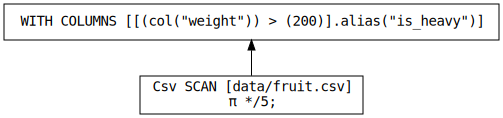

In [14]:
lazy_df = pl.scan_csv("data/fruit.csv").with_columns(
    is_heavy=pl.col("weight") > 200
)

lazy_df.show_graph()

Data Types. Polars uses the Apache Arrow memory specification, a columnar format optimized for efficient analytic operations on modern hardware (CPUs/GPUs). Polars' data types are mostly based on Arrow's specification, with multiple bit sizes available to minimize memory usage while fitting your data range.

Data types:
![Data types](img/datatypes.png)


Nested Data Types. Polars has three nested data types: Array, List, and Struct. An Array is a collection of elements that are of the same data type. Within a Series, each Array must have the same shape.

In [15]:
coordinates = pl.DataFrame(
    [
        pl.Series("point_2d", [[1, 3], [2, 5]]),
        pl.Series("point_3d", [[1, 7, 3], [8, 1, 0]]),
    ],
    schema={
        "point_2d": pl.Array(shape=2, inner=pl.Int64),
        "point_3d": pl.Array(shape=3, inner=pl.Int64),
    },
)

coordinates

point_2d,point_3d
"array[i64, 2]","array[i64, 3]"
"[1, 3]","[1, 7, 3]"
"[2, 5]","[8, 1, 0]"


In [16]:
# In contrast to the Array, a List does not have to have the same length on every row.
weather_readings = pl.DataFrame(
    {
        "temperature": [[72.5, 75.0, 77.3], [68.0, 70.2]],
        "wind_speed": [[15, 20], [10, 12, 14, 16]],
    }
)
weather_readings

temperature,wind_speed
list[f64],list[i64]
"[72.5, 75.0, 77.3]","[15, 20]"
"[68.0, 70.2]","[10, 12, … 16]"


In [17]:
# A Struct is often used to work multiple Series at once.
rating_series = pl.Series(
    "ratings",
    [
        {"Movie": "Cars", "Theatre": "NE", "Avg_Rating": 4.5},
        {"Movie": "Toy Story", "Theatre": "ME", "Avg_Rating": 4.9},
    ],
)
rating_series

ratings
struct[3]
"{""Cars"",""NE"",4.5}"
"{""Toy Story"",""ME"",4.9}"


# Expressions

In [18]:
fruit = pl.read_csv("data/fruit.csv")
fruit

name,weight,color,is_round,origin
str,i64,str,bool,str
"""Avocado""",200,"""green""",false,"""South America"""
"""Banana""",120,"""yellow""",false,"""Asia"""
"""Blueberry""",1,"""blue""",false,"""North America"""
"""Cantaloupe""",2500,"""orange""",true,"""Africa"""
"""Cranberry""",2,"""red""",false,"""North America"""
"""Elderberry""",1,"""black""",false,"""Europe"""
"""Orange""",130,"""orange""",true,"""Asia"""
"""Papaya""",1000,"""orange""",false,"""South America"""
"""Peach""",150,"""orange""",true,"""Asia"""


In [19]:
#Selecting Columns with Expressions
fruit.select(
    pl.col("name"),  
    pl.col("^.*or.*$"),  
    pl.col("weight") / 1000,  
    "is_round", 
)

name,color,origin,weight,is_round
str,str,str,f64,bool
"""Avocado""","""green""","""South America""",0.2,false
"""Banana""","""yellow""","""Asia""",0.12,false
"""Blueberry""","""blue""","""North America""",0.001,false
"""Cantaloupe""","""orange""","""Africa""",2.5,true
"""Cranberry""","""red""","""North America""",0.002,false
"""Elderberry""","""black""","""Europe""",0.001,false
"""Orange""","""orange""","""Asia""",0.13,true
"""Papaya""","""orange""","""South America""",1.0,false
"""Peach""","""orange""","""Asia""",0.15,true


In [20]:
# Creating New Columns with Expressions

fruit.with_columns(
    pl.lit(True).alias("is_fruit"),  
    is_berry=pl.col("name").str.ends_with("berry"),  
)

name,weight,color,is_round,origin,is_fruit,is_berry
str,i64,str,bool,str,bool,bool
"""Avocado""",200,"""green""",false,"""South America""",true,false
"""Banana""",120,"""yellow""",false,"""Asia""",true,false
"""Blueberry""",1,"""blue""",false,"""North America""",true,true
"""Cantaloupe""",2500,"""orange""",true,"""Africa""",true,false
"""Cranberry""",2,"""red""",false,"""North America""",true,true
"""Elderberry""",1,"""black""",false,"""Europe""",true,true
"""Orange""",130,"""orange""",true,"""Asia""",true,false
"""Papaya""",1000,"""orange""",false,"""South America""",true,false
"""Peach""",150,"""orange""",true,"""Asia""",true,false


In [21]:
# Filtering Rows with Expressions
fruit.filter(
    (pl.col("weight") > 1000)  
    & pl.col("is_round")  
)

# Aggregating with Expressions

fruit.group_by(pl.col("origin").str.split(" ").list.last()).agg(  
    pl.len(),  
    average_weight=pl.col("weight").mean()  
)

# Sorting Rows with Expressions

fruit.sort(
    pl.col("name").str.len_bytes(),  # <1> <2>
    descending=True,  
)


name,weight,color,is_round,origin
str,i64,str,bool,str
"""Cantaloupe""",2500,"""orange""",true,"""Africa"""
"""Elderberry""",1,"""black""",false,"""Europe"""
"""Watermelon""",5000,"""green""",true,"""Africa"""
"""Blueberry""",1,"""blue""",false,"""North America"""
"""Cranberry""",2,"""red""",false,"""North America"""
"""Avocado""",200,"""green""",false,"""South America"""
"""Banana""",120,"""yellow""",false,"""Asia"""
"""Orange""",130,"""orange""",true,"""Asia"""
"""Papaya""",1000,"""orange""",false,"""South America"""


The Definition of an Expression:

    - Series
    - Tree of operations
    - Describe
    - Construct
    - One or more

In [22]:
(pl.lit(3).add(5) / pl.lit(1).add(5)).meta.tree_format()
     

(
    pl.DataFrame({"a": [1, 2, 3], "b": [0.4, 0.5, 0.6]}).with_columns(
        pl.all().mul(10).name.suffix("_times_10")
    )
)
     

pl.all().mul(10).name.suffix("_times_10").meta.has_multiple_outputs()

               0                    1                    2                    3
   ┌────────────────────────────────────────────────────────────────────────────────────
   │
   │     ╭───────────╮
 0 │     │ binary: / │
   │     ╰─────┬┬────╯
   │           ││
   │           │╰────────────────────────────────────────╮
   │           │                                         │
   │     ╭─────┴─────╮                             ╭─────┴─────╮
 1 │     │ binary: + │                             │ binary: + │
   │     ╰─────┬┬────╯                             ╰─────┬┬────╯
   │           ││                                        ││
   │           │╰───────────────────╮                    │╰───────────────────╮
   │           │                    │                    │                    │
   │  ╭────────┴────────╮  ╭────────┴────────╮  ╭────────┴────────╮  ╭────────┴────────╮
 2 │  │ lit(dyn int: 5) │  │ lit(dyn int: 1) │  │ lit(dyn int: 5) │  │ lit(dyn int: 3) │
   │  ╰─────────────────╯  ╰

True

In [23]:
is_orange = (pl.col("color") == "orange").alias("is_orange")

fruit.with_columns(is_orange)
     

fruit.filter(is_orange)
     

fruit.group_by(is_orange).len()

is_orange,len
bool,u32
true,4
false,6


In [24]:
flowers = pl.DataFrame(
    {
        "name": ["Tiger lily", "Blue flag", "African marigold"],
        "latin": ["Lilium columbianum", "Iris versicolor", "Tagetes erecta"],
        "color": ["orange", "purple", "orange"],
    }
)

flowers.filter(is_orange)

name,latin,color
str,str,str
"""Tiger lily""","""Lilium columbianum""","""orange"""
"""African marigold""","""Tagetes erecta""","""orange"""


In [25]:
# Creating Expressions from Existing Columns:
fruit.select(pl.col("color")).columns
     
# This raises a ColumnNotFoundError:
# fruit.select(pl.col("is_smelly")).columns
     
fruit.select(pl.col("^.*or.*$")).columns
     

fruit.select(pl.all()).columns
     

fruit.select(pl.col(pl.String)).columns
     

fruit.select(pl.col(pl.Boolean, pl.Int64)).columns
     

fruit.select(pl.col(["name", "color"])).columns
     

['name', 'color']

In [26]:
# Creating Expressions From Ranges

pl.select(
    start=pl.int_range(0, 5), end=pl.arange(0, 10, 2).pow(2)
).with_columns(int_range=pl.int_ranges("start", "end")).with_columns(
    range_length=pl.col("int_range").list.len()
)
     

pl.select(
    start=pl.date_range(pl.date(1985, 10, 21), pl.date(1985, 10, 26)),
    end=pl.repeat(pl.date(2021, 10, 21), 6),
).with_columns(range=pl.datetime_ranges("start", "end", interval="1h"))
     

start,end,range
date,date,list[datetime[μs]]
1985-10-21,2021-10-21,"[1985-10-21 00:00:00, 1985-10-21 01:00:00, … 2021-10-21 00:00:00]"
1985-10-22,2021-10-21,"[1985-10-22 00:00:00, 1985-10-22 01:00:00, … 2021-10-21 00:00:00]"
1985-10-23,2021-10-21,"[1985-10-23 00:00:00, 1985-10-23 01:00:00, … 2021-10-21 00:00:00]"
1985-10-24,2021-10-21,"[1985-10-24 00:00:00, 1985-10-24 01:00:00, … 2021-10-21 00:00:00]"
1985-10-25,2021-10-21,"[1985-10-25 00:00:00, 1985-10-25 01:00:00, … 2021-10-21 00:00:00]"
1985-10-26,2021-10-21,"[1985-10-26 00:00:00, 1985-10-26 01:00:00, … 2021-10-21 00:00:00]"


In [27]:
# Renaming Expressions

df = pl.DataFrame({"text": "value", "An integer": 5040, "BOOLEAN": True})
df
     

df.select(
    pl.col("text").name.to_uppercase(),
    pl.col("An integer").alias("int"),
    pl.col("BOOLEAN").name.to_lowercase(),
)
     

TEXT,int,boolean
str,i64,bool
"""value""",5040,true


Combining Expressions

In [28]:
fruit = pl.read_csv("data/fruit.csv")
fruit.filter(pl.col("is_round") & (pl.col("weight") > 1000))  

name,weight,color,is_round,origin
str,i64,str,bool,str
"""Cantaloupe""",2500,"""orange""",true,"""Africa"""
"""Watermelon""",5000,"""green""",true,"""Africa"""


In [29]:
(
    pl.DataFrame({"i": [6.0, 0, 2, 2.5], "j": [7.0, 1, 2, 3]}).with_columns(
        (pl.col("i") * pl.col("j")).alias("*"),
        pl.col("i").mul(pl.col("j")).alias("Expr.mul()"),
    )
)

i,j,*,Expr.mul()
f64,f64,f64,f64
6.0,7.0,42.0,42.0
0.0,1.0,0.0,0.0
2.0,2.0,4.0,4.0
2.5,3.0,7.5,7.5


In [30]:
# Arithmetic Operations
(
    pl.DataFrame({"i": [0.0, 2, 2, -2, -2], "j": [1, 2, 3, 4, -5]}).with_columns(
        (pl.col("i") + pl.col("j")).alias("i + j"),
        (pl.col("i") - pl.col("j")).alias("i - j"),
        (pl.col("i") * pl.col("j")).alias("i * j"),
        (pl.col("i") / pl.col("j")).alias("i / j"),
        (pl.col("i") // pl.col("j")).alias("i // j"),
        (pl.col("i") ** pl.col("j")).alias("i ** j"),
        (pl.col("j") % 2).alias("j % 2"),  
        pl.col("i").dot(pl.col("j")).alias("i ⋅ j"),  
    )
)

i,j,i + j,i - j,i * j,i / j,i // j,i ** j,j % 2,i ⋅ j
f64,i64,f64,f64,f64,f64,f64,f64,i64,f64
0.0,1,1.0,-1.0,0.0,0.0,0.0,0.0,1,12.0
2.0,2,4.0,0.0,4.0,1.0,1.0,4.0,0,12.0
2.0,3,5.0,-1.0,6.0,0.666667,0.0,8.0,1,12.0
-2.0,4,2.0,-6.0,-8.0,-0.5,-1.0,16.0,0,12.0
-2.0,-5,-7.0,3.0,10.0,0.4,0.0,-0.03125,1,12.0


# Eager and Lazy APIs


In [31]:
import time
# Eager API: DataFrame

In [33]:
%%time
trips = pl.read_parquet("data/taxi/yellow_tripdata_*.parquet")

sum_per_vendor = (
    trips
    .group_by("VendorID")
    .agg(
        pl.col("total_amount").sum().alias("total_amount_sum"),
        pl.col("trip_distance").sum().alias("trip_distance_sum"),
    )
)

income_per_distance_per_vendor = (
    sum_per_vendor
    .with_columns(
        (pl.col("total_amount_sum") / pl.col("trip_distance_sum"))
        .alias("income_per_distance")
    )
)

top_three = (
    income_per_distance_per_vendor
    .filter(pl.col("trip_distance_sum") > 0)   # avoid divide-by-zero
    .sort("income_per_distance", descending=True)
    .head(3)
)

top_three

     


CPU times: user 5.83 s, sys: 2.78 s, total: 8.61 s
Wall time: 1.42 s


VendorID,total_amount_sum,trip_distance_sum,income_per_distance
i64,f64,f64,f64
1,2.3562e8,3.6616e7,6.434789
6,2.7891e6,526585.91,5.296493
5,9975.21,2108.23,4.731557


Lazy API: LazyFrame.

The lazy API defers executing all selection, filtering, and manipulation until the moment it is actually needed.

It reduces the amount of data:

    - Only reading columns that are needed
    - Filtering out rows that are not needed
    - Only reading parts of the column that are needed for the query



Performance Differences

In [35]:
%%time
trips = pl.scan_parquet("data/taxi/yellow_tripdata_*.parquet")

top_three = (
    trips
    .group_by("VendorID")
    .agg(
        pl.col("total_amount").sum().alias("total_amount_sum"),
        pl.col("trip_distance").sum().alias("trip_distance_sum"),
    )
    .filter(pl.col("trip_distance_sum") > 0)  # avoid divide-by-zero
    .with_columns(
        (pl.col("total_amount_sum") / pl.col("trip_distance_sum"))
        .alias("income_per_distance")
    )
    .select("VendorID", "income_per_distance")
    .sort("income_per_distance", descending=True)
    .head(3)
)

top_three.collect()
     

CPU times: user 1.87 s, sys: 54.7 ms, total: 1.92 s
Wall time: 362 ms


VendorID,income_per_distance
i64,f64
1,6.434789
6,5.296493
5,4.731557


The lazy API can catch data type errors before processing the data.

In [37]:
# This raises a SchemaError:
names_lf = pl.LazyFrame(
    {"name": ["Alice", "Bob", "Charlie"], "age": [25, 30, 35]}
)

result_df = (
    names_lf
    .with_columns(
        sliced_age=pl.col("age")
        .cast(pl.Utf8)          # type conversion is lazy
        .str.slice(1, 3)
    )
    .collect()
)
     


# Selecting and Creating Columns


In [38]:

starwars = pl.read_parquet("data/starwars.parquet")
rebels = starwars.drop("films").filter(
    pl.col("name").is_in(["Luke Skywalker", "Leia Organa", "Han Solo"])
)

rebels

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,vehicles,starships,birth_date,screen_time
str,u16,f64,str,str,str,f64,cat,cat,str,str,list[str],list[str],date,duration[μs]
"""Han Solo""",180,80.0,"""brown""","""fair""","""brown""",29.0,"""male""","""masculine""","""Corellia""","""Human""",null,"[""Millennium Falcon"", ""Imperial shuttle""]",1948-06-01,1h 12m 37s
"""Leia Organa""",150,49.0,"""brown""","""light""","""brown""",19.0,"""female""","""feminine""","""Alderaan""","""Human""","[""Imperial Speeder Bike""]",null,1958-05-30,1h 3m 40s
"""Luke Skywalker""",172,77.0,"""blond""","""fair""","""blue""",19.0,"""male""","""masculine""","""Tatooine""","""Human""","[""Snowspeeder"", ""Imperial Speeder Bike""]","[""X-wing"", ""Imperial shuttle""]",1958-05-30,1h 58m 44s


In [39]:

rebels.select(
    "name",
    pl.col("homeworld"),
    pl.col("^.*_color$"),
    (pl.col("height") / 100).alias("height_m"),
)

name,homeworld,hair_color,skin_color,eye_color,height_m
str,str,str,str,str,f64
"""Han Solo""","""Corellia""","""brown""","""fair""","""brown""",1.8
"""Leia Organa""","""Alderaan""","""brown""","""light""","""brown""",1.5
"""Luke Skywalker""","""Tatooine""","""blond""","""fair""","""blue""",1.72


In [40]:
# Introducing Selectors
import polars.selectors as cs
     
rebels.select(
    "name",
    cs.by_name("homeworld"),
    cs.by_name("^.*_color$"),
    (cs.by_name("height") / 100).alias("height_m"),
)
     



name,homeworld,hair_color,skin_color,eye_color,height_m
str,str,str,str,str,f64
"""Han Solo""","""Corellia""","""brown""","""fair""","""brown""",1.8
"""Leia Organa""","""Alderaan""","""brown""","""light""","""brown""",1.5
"""Luke Skywalker""","""Tatooine""","""blond""","""fair""","""blue""",1.72


In [41]:
# Creating Columns
rebels.with_columns(bmi=pl.col("mass") / ((pl.col("height") / 100) ** 2))

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,vehicles,starships,birth_date,screen_time,bmi
str,u16,f64,str,str,str,f64,cat,cat,str,str,list[str],list[str],date,duration[μs],f64
"""Han Solo""",180,80.0,"""brown""","""fair""","""brown""",29.0,"""male""","""masculine""","""Corellia""","""Human""",null,"[""Millennium Falcon"", ""Imperial shuttle""]",1948-06-01,1h 12m 37s,24.691358
"""Leia Organa""",150,49.0,"""brown""","""light""","""brown""",19.0,"""female""","""feminine""","""Alderaan""","""Human""","[""Imperial Speeder Bike""]",null,1958-05-30,1h 3m 40s,21.777778
"""Luke Skywalker""",172,77.0,"""blond""","""fair""","""blue""",19.0,"""male""","""masculine""","""Tatooine""","""Human""","[""Snowspeeder"", ""Imperial Speeder Bike""]","[""X-wing"", ""Imperial shuttle""]",1958-05-30,1h 58m 44s,26.027582


# Filtering and Sorting Rows


In [42]:
tools = pl.read_csv("data/tools.csv")
tools

tool,product,brand,cordless,price,rpm
str,str,str,bool,i64,i64
"""Rotary Hammer""","""HR2230""","""Makita""",false,199,1050
"""Miter Saw""","""GCM 8 SJL""","""Bosch""",false,391,5500
"""Plunge Cut Saw""","""DSP600ZJ""","""Makita""",true,459,6300
"""Impact Driver""","""DTD157Z""","""Makita""",true,156,3000
"""Jigsaw""","""PST 900 PEL""","""Bosch""",false,79,3100
"""Angle Grinder""","""DGA504ZJ""","""Makita""",true,229,8500
"""Nail Gun""","""DPSB2IN1-XJ""","""DeWalt""",true,129,null
"""Router""","""POF 1400 ACE""","""Bosch""",false,185,28000
"""Random Orbital Sander""","""DBO180ZJ""","""Makita""",true,199,11000


In [43]:
tools.filter(pl.col("cordless") & (pl.col("brand") == "Makita"))  

tool,product,brand,cordless,price,rpm
str,str,str,bool,i64,i64
"""Plunge Cut Saw""","""DSP600ZJ""","""Makita""",true,459,6300
"""Impact Driver""","""DTD157Z""","""Makita""",true,156,3000
"""Angle Grinder""","""DGA504ZJ""","""Makita""",true,229,8500
"""Random Orbital Sander""","""DBO180ZJ""","""Makita""",true,199,11000


In [44]:
tools.filter("cordless")

tool,product,brand,cordless,price,rpm
str,str,str,bool,i64,i64
"""Plunge Cut Saw""","""DSP600ZJ""","""Makita""",true,459,6300
"""Impact Driver""","""DTD157Z""","""Makita""",true,156,3000
"""Angle Grinder""","""DGA504ZJ""","""Makita""",true,229,8500
"""Nail Gun""","""DPSB2IN1-XJ""","""DeWalt""",true,129,null
"""Random Orbital Sander""","""DBO180ZJ""","""Makita""",true,199,11000


# Working with Textual, Temporal, and Nested Data Types

In [45]:
# String Examples

corpus = pl.DataFrame(
    {
        "raw_text": [
            "  Data Science is amazing ",
            "Data_analysis > Data entry",
            " Python&Polars; Fast",
        ]
    }
)

corpus


raw_text
str
""" Data Science is amazing """
"""Data_analysis > Data entry"""
""" Python&Polars; Fast"""


In [46]:
corpus = corpus.with_columns(
    processed_text=pl.col("raw_text")  
    .str.strip_chars()  
    .str.to_lowercase()  
    .str.replace_all("_", " ")  
)
corpus

raw_text,processed_text
str,str
""" Data Science is amazing ""","""data science is amazing"""
"""Data_analysis > Data entry""","""data analysis > data entry"""
""" Python&Polars; Fast""","""python&polars; fast"""


In [47]:
# Categorical

cats = pl.DataFrame(
    {"name": ["Persian cat", "Siamese Cat", "Lynx", "Lynx"]},
    schema={"name": pl.Categorical},
)

cats.with_columns(name_physical=pl.col("name").to_physical())


name,name_physical
cat,u32
"""Persian cat""",5
"""Siamese Cat""",6
"""Lynx""",7
"""Lynx""",7


In [48]:
# Categorical Examples

more_cats = pl.DataFrame(
    {"name": ["Maine Coon Cat", "Lynx", "Lynx", "Siamese Cat"]},
    schema={"name": pl.Categorical},
)

more_cats.with_columns(name_physical=pl.col("name").to_physical())
     

name,name_physical
cat,u32
"""Maine Coon Cat""",8
"""Lynx""",7
"""Lynx""",7
"""Siamese Cat""",6


In [49]:

# Enum

bear_enum_dtype = pl.Enum(["Polar", "Panda", "Brown"])

bear_enum_series = pl.Series(
    ["Polar", "Panda", "Brown", "Brown", "Polar"], dtype=bear_enum_dtype
)

bear_cat_series = pl.Series(
    ["Polar", "Panda", "Brown", "Brown", "Polar"], dtype=pl.Categorical
)
     


In [50]:
# Temporal Examples
# Loading from a CSV file

pl.read_csv("data/all_stocks.csv", try_parse_dates=True)
   

symbol,date,open,high,low,close,adj close,volume
str,date,f64,f64,f64,f64,f64,i64
"""ASML""",1999-01-04,11.765625,12.28125,11.765625,12.140625,7.522523,1801867
"""ASML""",1999-01-05,11.859375,14.25,11.71875,13.96875,8.655257,8241600
"""ASML""",1999-01-06,14.25,17.601563,14.203125,16.875,10.456018,16400267
"""ASML""",1999-01-07,14.742188,17.8125,14.53125,16.851563,10.441495,17722133
"""ASML""",1999-01-08,16.078125,16.289063,15.023438,15.796875,9.787995,10696000
…,…,…,…,…,…,…,…
"""TSM""",2023-06-26,102.019997,103.040001,100.089996,100.110001,99.125954,8560000
"""TSM""",2023-06-27,101.150002,102.790001,100.019997,102.080002,101.076591,9732000
"""TSM""",2023-06-28,100.5,101.879997,100.220001,100.919998,99.927986,8160900


In [51]:
  # Converting to and from a String

dates = pl.DataFrame({"date_str": ["2023-12-31", "2024-02-29"]}).with_columns(
    date=pl.col("date_str").str.to_date("%Y-%m-%d")
)

dates
     

dates.with_columns(formatted_date=pl.col("date").dt.to_string("%d-%m-%Y"))

date_str,date,formatted_date
str,date,str
"""2023-12-31""",2023-12-31,"""31-12-2023"""
"""2024-02-29""",2024-02-29,"""29-02-2024"""


In [ ]:
# Generating date ranges

pl.DataFrame(
    {
        "monday": pl.date_range(
            start=pl.date(2024, 10, 28),
            end=pl.date(2024, 12, 1),
            interval="1w",  
            eager=True,  
        ),
    }
)


monday
date
2024-10-28
2024-11-04
2024-11-11
2024-11-18
2024-11-25


In [53]:

# Array Examples

events = pl.DataFrame(
    [
        pl.Series(
            "location", ["Paris", "Amsterdam", "Barcelona"], dtype=pl.String
        ),
        pl.Series(
            "temperatures",
            [
                [23, 27, 21, 22, 24, 23, 22],
                [17, 19, 15, 22, 18, 20, 21],
                [30, 32, 28, 29, 34, 33, 31],
            ],
            dtype=pl.Array(pl.Int64, shape=7),
        ),
    ]
)

events
      


location,temperatures
str,"array[i64, 7]"
"""Paris""","[23, 27, … 22]"
"""Amsterdam""","[17, 19, … 21]"
"""Barcelona""","[30, 32, … 31]"


In [54]:
events.with_columns(
    median=pl.col("temperatures").arr.median(),
    max=pl.col("temperatures").arr.max(),
    warmest_dow=pl.col("temperatures").arr.arg_max(),
)
    

location,temperatures,median,max,warmest_dow
str,"array[i64, 7]",f64,i64,u32
"""Paris""","[23, 27, … 22]",23.0,27,1
"""Amsterdam""","[17, 19, … 21]",19.0,22,3
"""Barcelona""","[30, 32, … 31]",31.0,34,4


In [55]:
# Struct
# Struct Examples

from datetime import date

orders = pl.DataFrame(
    {
        "customer_id": [2781, 6139, 5392],
        "order_details": [
            {"amount": 250.00, "date": date(2024, 1, 3), "items": 5},
            {"amount": 150.00, "date": date(2024, 1, 5), "items": 1},
            {"amount": 100.00, "date": date(2024, 1, 2), "items": 3},
        ],
    },
)

orders

customer_id,order_details
i64,struct[3]
2781,"{250.0,2024-01-03,5}"
6139,"{150.0,2024-01-05,1}"
5392,"{100.0,2024-01-02,3}"


In [56]:
orders.select(pl.col("order_details").struct.field("amount"))
     

order_details_df = orders.unnest("order_details")

order_details_df

customer_id,amount,date,items
i64,f64,date,i64
2781,250.0,2024-01-03,5
6139,150.0,2024-01-05,1
5392,100.0,2024-01-02,3


# Joining and Concatenating


In [57]:
# Join Strategies

df_left = pl.DataFrame({"key": ["A", "B", "C", "D"], "value": [1, 2, 3, 4]})

df_right = pl.DataFrame({"key": ["B", "C", "D", "E"], "value": [5, 6, 7, 8]})

In [58]:

# Vertical

df1 = pl.DataFrame(
    {
        "id": [1, 2, 3],
        "value": ["a", "b", "c"],
    }
)
df2 = pl.DataFrame(
    {
        "id": [4, 5],
        "value": ["d", "e"],
    }
)
pl.concat([df1, df2], how="vertical")
     


id,value
i64,str
1,"""a"""
2,"""b"""
3,"""c"""
4,"""d"""
5,"""e"""


In [59]:
# Wide Versus Long DataFrames

grades_wide = pl.DataFrame(
    {
        "student": ["Jeroen", "Thijs", "Ritchie"],
        "math": [85, 78, 92],
        "science": [90, 82, 85],
        "history": [88, 80, 87],
    }
)

grades_wide
     


student,math,science,history
str,i64,i64,i64
"""Jeroen""",85,90,88
"""Thijs""",78,82,80
"""Ritchie""",92,85,87


In [60]:
multiple_grades = pl.DataFrame(
    {
        "student": [
            "Jeroen",
            "Jeroen",
            "Jeroen",
            "Jeroen",
            "Jeroen",
            "Jeroen",
            "Thijs",
            "Thijs",
            "Thijs",
            "Thijs",
            "Thijs",
            "Thijs",
        ],
        "subject": [
            "Math",
            "Math",
            "Math",
            "Science",
            "Science",
            "Science",
            "Math",
            "Math",
            "Math",
            "Science",
            "Science",
            "Science",
        ],
        "grade": [85, 88, 85, 60, 66, 63, 51, 79, 62, 82, 85, 82],
    }
)

multiple_grades
multiple_grades.pivot(
    index="student", on="subject", values="grade", aggregate_function="mean"
)
     


student,Math,Science
str,f64,f64
"""Jeroen""",86.0,63.0
"""Thijs""",64.0,83.0


In [61]:
# Unpivot to a Longer DataFrame

grades_wide = pl.DataFrame(
    {
        "student": ["Jeroen", "Thijs", "Ritchie"],
        "math": [85, 78, 92],
        "science": [90, 82, 85],
        "history": [88, 80, 87],
    }
)

grades_wide

student,math,science,history
str,i64,i64,i64
"""Jeroen""",85,90,88
"""Thijs""",78,82,80
"""Ritchie""",92,85,87


In [62]:
grades_wide.unpivot(
    index=["student"],
    on=["math", "science", "history"],
    variable_name="subject",
    value_name="grade",
)

student,subject,grade
str,str,i64
"""Jeroen""","""math""",85
"""Thijs""","""math""",78
"""Ritchie""","""math""",92
"""Jeroen""","""science""",90
"""Thijs""","""science""",82
"""Ritchie""","""science""",85
"""Jeroen""","""history""",88
"""Thijs""","""history""",80
"""Ritchie""","""history""",87


In [63]:
# Partition into Multiple DataFrames

sales = pl.DataFrame(
    {
        "OrderID": [1, 2, 3, 4, 5, 6],
        "Product": ["A", "B", "A", "C", "B", "A"],
        "Quantity": [10, 5, 8, 7, 3, 12],
        "Region": ["North", "South", "North", "West", "South", "West"],
    }
)
     

sales.partition_by("Region")

[shape: (2, 4)
 ┌─────────┬─────────┬──────────┬────────┐
 │ OrderID ┆ Product ┆ Quantity ┆ Region │
 │ ---     ┆ ---     ┆ ---      ┆ ---    │
 │ i64     ┆ str     ┆ i64      ┆ str    │
 ╞═════════╪═════════╪══════════╪════════╡
 │ 1       ┆ A       ┆ 10       ┆ North  │
 │ 3       ┆ A       ┆ 8        ┆ North  │
 └─────────┴─────────┴──────────┴────────┘,
 shape: (2, 4)
 ┌─────────┬─────────┬──────────┬────────┐
 │ OrderID ┆ Product ┆ Quantity ┆ Region │
 │ ---     ┆ ---     ┆ ---      ┆ ---    │
 │ i64     ┆ str     ┆ i64      ┆ str    │
 ╞═════════╪═════════╪══════════╪════════╡
 │ 2       ┆ B       ┆ 5        ┆ South  │
 │ 5       ┆ B       ┆ 3        ┆ South  │
 └─────────┴─────────┴──────────┴────────┘,
 shape: (2, 4)
 ┌─────────┬─────────┬──────────┬────────┐
 │ OrderID ┆ Product ┆ Quantity ┆ Region │
 │ ---     ┆ ---     ┆ ---      ┆ ---    │
 │ i64     ┆ str     ┆ i64      ┆ str    │
 ╞═════════╪═════════╪══════════╪════════╡
 │ 4       ┆ C       ┆ 7        ┆ West   │
 │ 6   